**Import Neccasary Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Dataset Loading
df = pd.read_csv('pollution_datasets.csv')
print("Data loaded successfully. First 5 rows:")
print(df.head())

Data loaded successfully. First 5 rows:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  roads  dump_sites  agricultural_fields  \
0                            6.3     34           4                    3   
1                            6.0     28           2                    3   
2                            5.2     36           0                   11   
3                           11.1     45           3                    9   
4                           12.7     27           2                    4   

   wind_speed  wind_direction  
0         0.3             355  
1         0.5             355  
2         0.6             355  
3         0.5       

**EDA Processing**

In [3]:
print("DataFrame Info:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5200 non-null   float64
 1   Humidity                       5200 non-null   float64
 2   PM2.5                          5200 non-null   float64
 3   PM10                           5200 non-null   float64
 4   NO2                            5200 non-null   float64
 5   SO2                            5200 non-null   float64
 6   CO                             5200 non-null   float64
 7   Proximity_to_Industrial_Areas  5200 non-null   float64
 8   roads                          5200 non-null   int64  
 9   dump_sites                     5200 non-null   int64  
 10  agricultural_fields            5200 non-null   int64  
 11  wind_speed                     5200 non-null   float64
 12  wind_direction                 5

In [4]:
print("Descriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5200.000000  5200.000000  5200.000000  5200.000000  5200.000000   
mean     30.020596    70.070731    23.389599    30.136558    27.142136   
std       6.727288    15.848501    34.722867    27.273542    10.161869   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.700000    12.300000    20.200000   
50%      29.000000    69.800000    12.300000    21.600000    25.400000   
75%      34.000000    80.400000    27.700000    38.000000    32.400000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas        roads  \
count  5200.000000  5200.000000                    5200.000000  5200.000000   
mean     10.633328     1.500131                       8.434115    29.547885   
std       8.066453     0.546102                   

In [5]:
df['PM10'] = df['PM10'].apply(lambda x: max(x, 0))
df['SO2'] = df['SO2'].apply(lambda x: max(x, 0))
df['Humidity'] = df['Humidity'].apply(lambda x: min(x, 100))
print("Negative values in PM10 and SO2 replaced with 0. Humidity values capped at 100.")
print("Descriptive statistics after cleaning:")
print(df.describe())

Negative values in PM10 and SO2 replaced with 0. Humidity values capped at 100.
Descriptive statistics after cleaning:
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5200.000000  5200.000000  5200.000000  5200.000000  5200.000000   
mean     30.020596    69.827942    23.389599    30.136596    27.142136   
std       6.727288    15.293109    34.722867    27.273499    10.161869   
min      13.400000    36.000000     0.000000     0.000000     7.400000   
25%      25.100000    58.300000     4.700000    12.300000    20.200000   
50%      29.000000    69.800000    12.300000    21.600000    25.400000   
75%      34.000000    80.400000    27.700000    38.000000    32.400000   
max      58.600000   100.000000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas        roads  \
count  5200.000000  5200.000000                    5200.000000  5200.000000   
mean     10.639040     1.500131                       8.

## Visualize Data

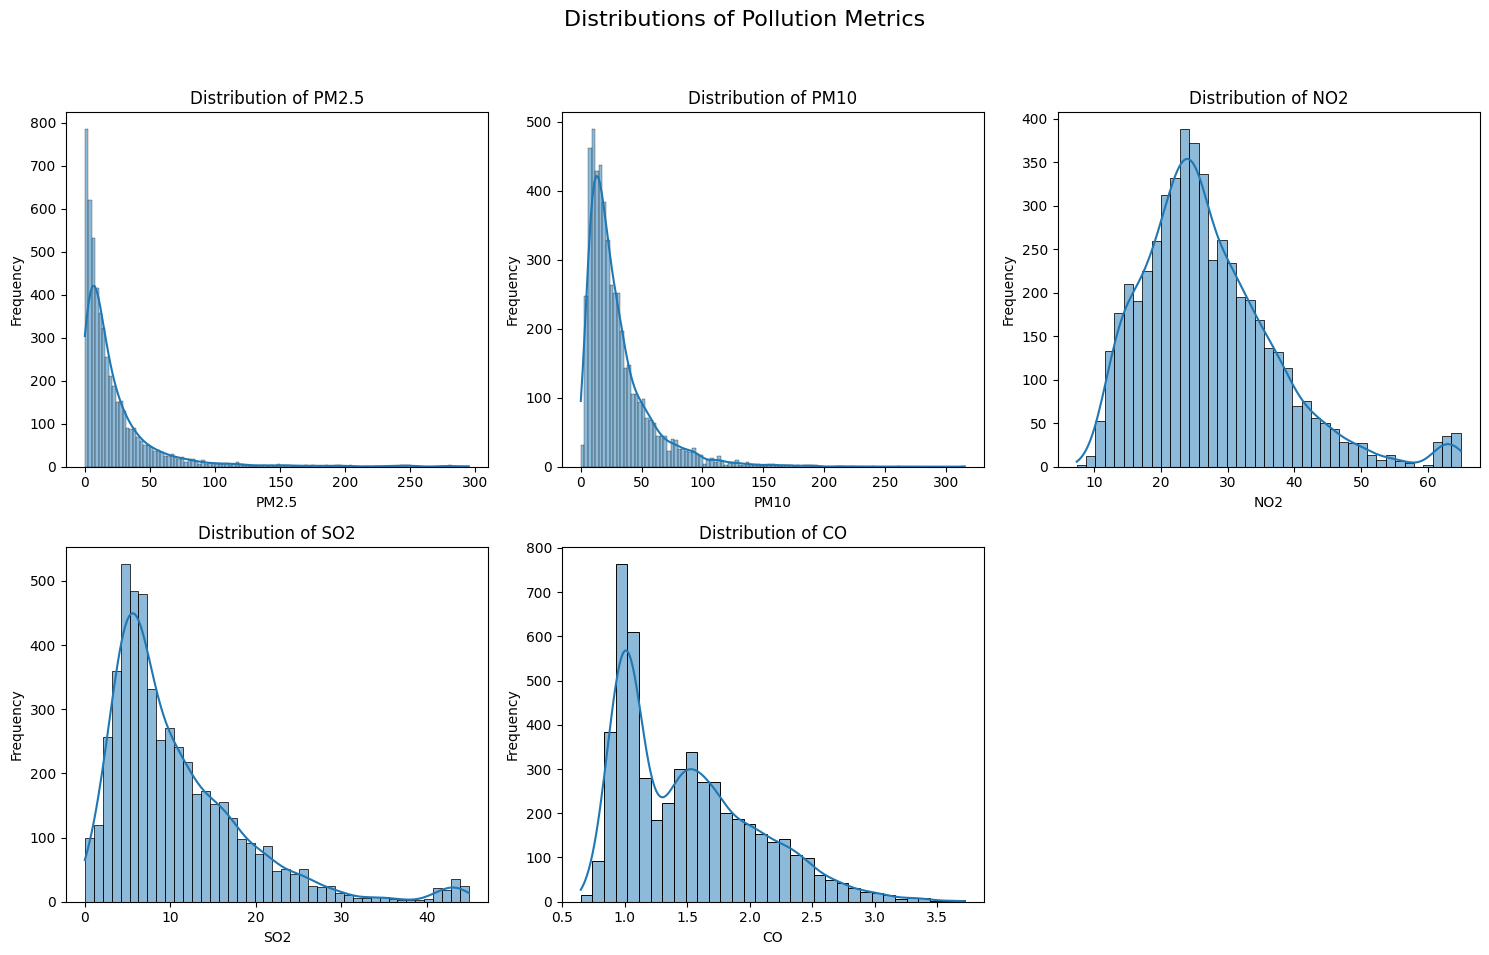

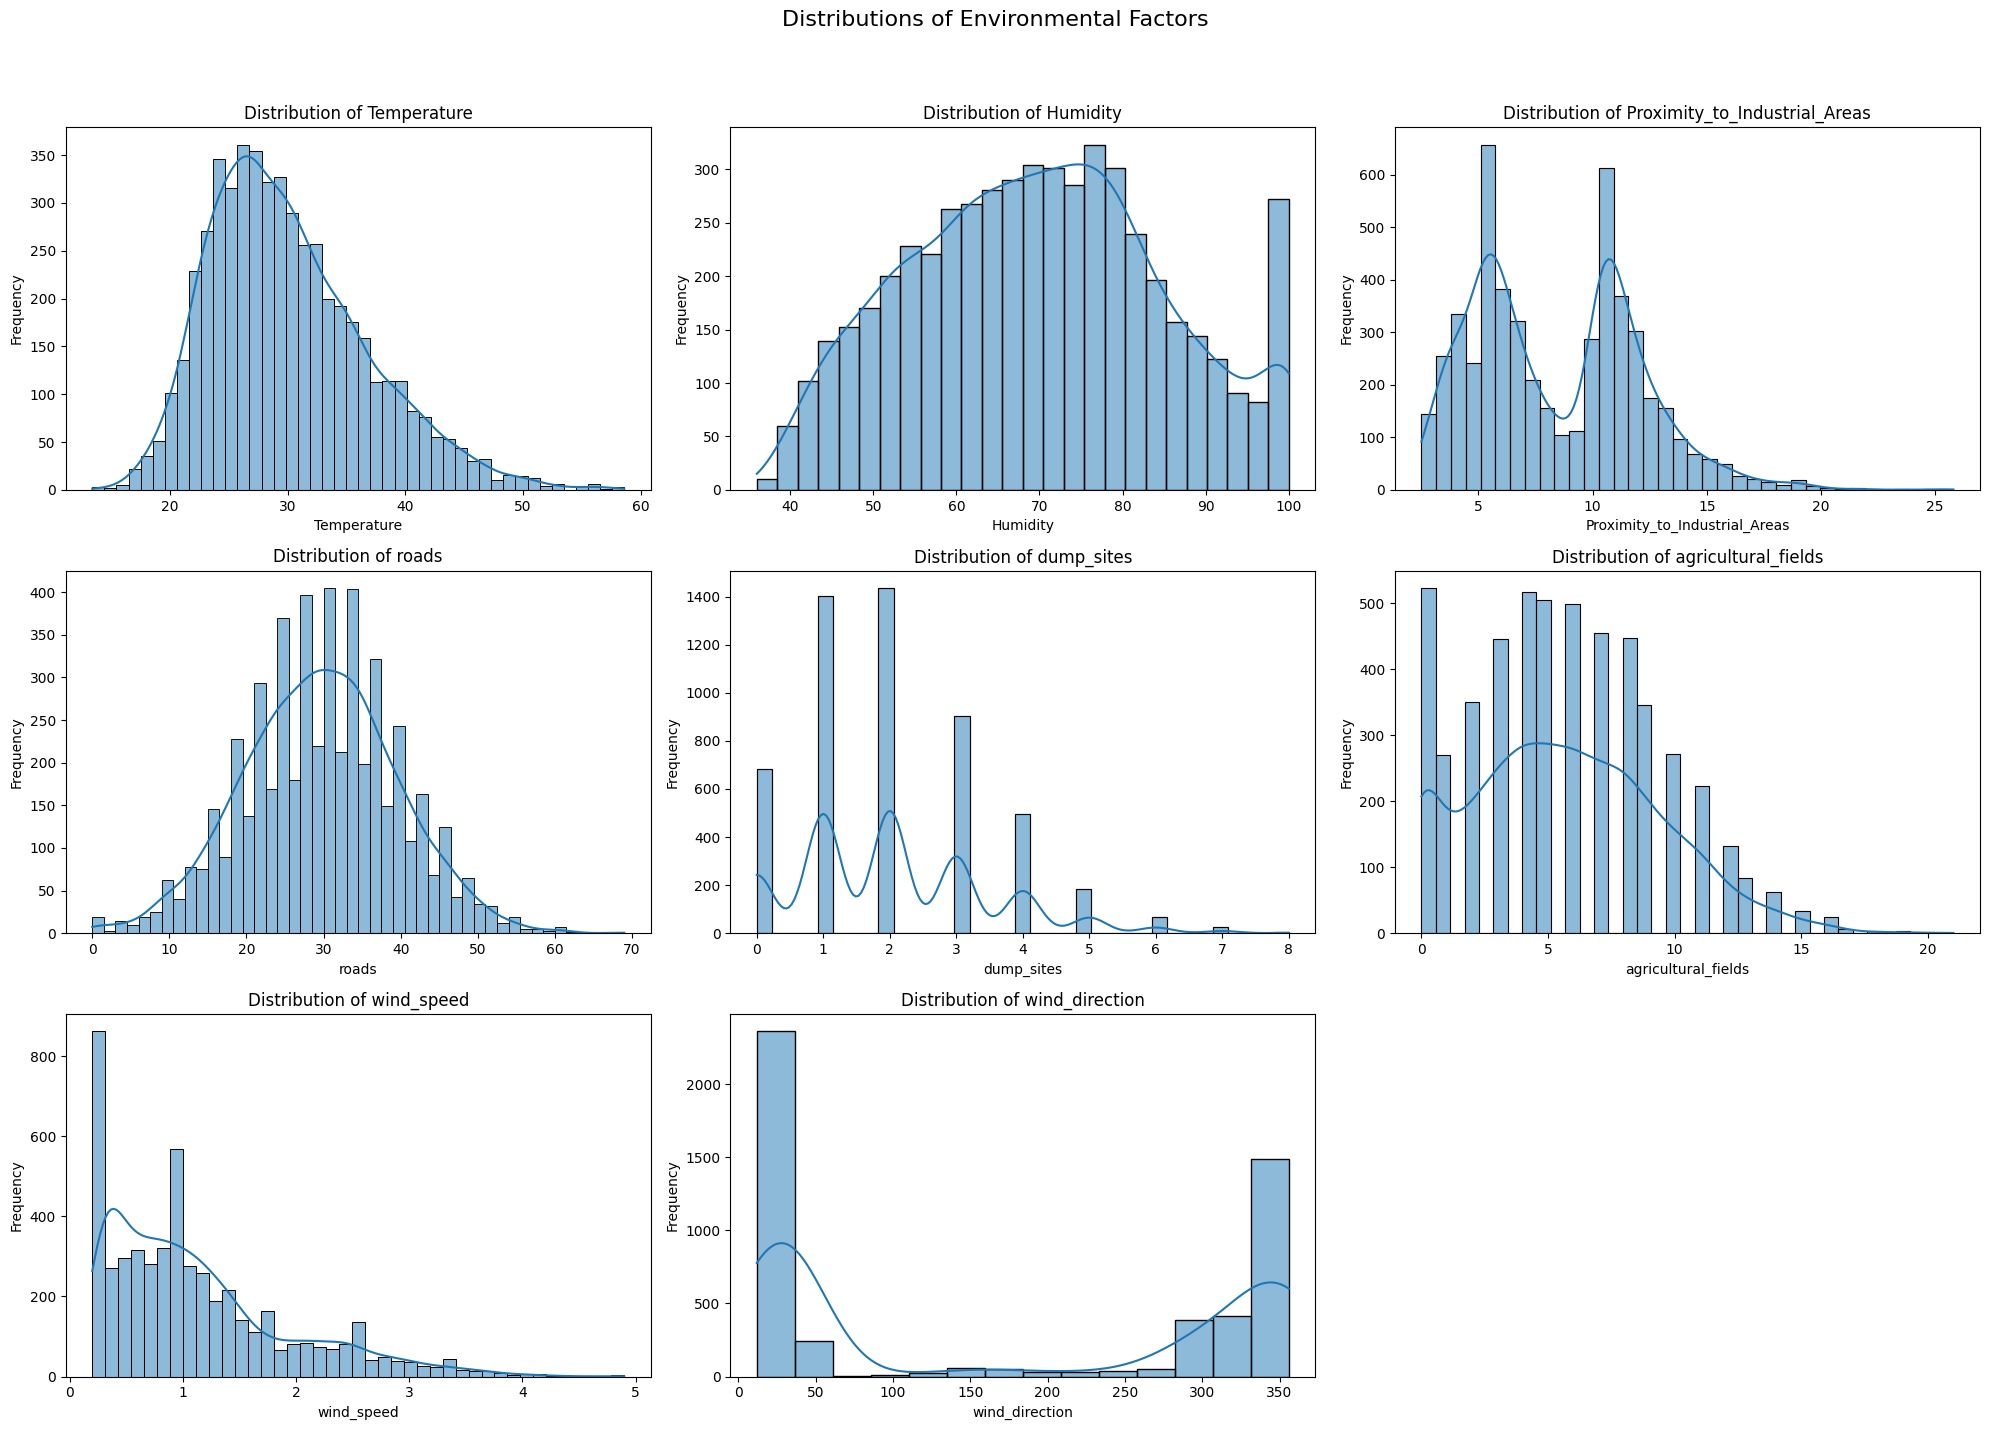

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for pollution metrics
pollution_metrics = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']
plt.figure(figsize=(15, 10))
plt.suptitle('Distributions of Pollution Metrics', fontsize=16)
for i, col in enumerate(pollution_metrics):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Histograms for environmental factors
environmental_factors = ['Temperature', 'Humidity', 'Proximity_to_Industrial_Areas', 'roads', 'dump_sites', 'agricultural_fields', 'wind_speed', 'wind_direction']
plt.figure(figsize=(20, 15))
plt.suptitle('Distributions of Environmental Factors', fontsize=16)
for i, col in enumerate(environmental_factors):
    plt.subplot(3, 3, i + 1) # Adjust subplot layout for 8 plots
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [7]:
df = df.rename(columns={
    "PM2.5": "PM2_5"
})
df.columns


Index(['Temperature', 'Humidity', 'PM2_5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'roads', 'dump_sites',
       'agricultural_fields', 'wind_speed', 'wind_direction'],
      dtype='object')

**Source Labelling**

In [8]:
def create_pollution_source(row):
    # 1. INDUSTRIAL (Highest Priority)
    # High SO2 is a strong signature of fossil fuel burning (factories/power plants).
    # If we see high SO2 near an industrial area, it overrides other signals.
    if row["SO2"] > 15 and row["Proximity_to_Industrial_Areas"] > 0.5:
        return "Industrial"

    # 2. VEHICULAR (Strong Priority)
    # High NO2 combined with CO is the classic traffic signature.
    # We check this next because cities often have both traffic and other sources.
    if row["NO2"] > 30 and row["CO"] > 1.0 and row["roads"] > 3000:
        return "Vehicular"

    # 3. BIOMASS BURNING
    # Characterized by very high PM2.5 and CO, often in areas with fewer roads.
    # We check this before Agricultural to catch specific burning events.
    if row["PM2_5"] > 55 and row["CO"] > 1.2 and row["roads"] < 2000:
        return "Biomass"

    # 4. AGRICULTURAL
    # Often dusty (PM2.5/PM10) near fields, but lower gas levels (NO2/SO2).
    if row["PM2_5"] > 35 and row["agricultural_fields"] > 4:
        return "Agricultural"

    # 5. URBAN BACKGROUND
    # General pollution in a city without a specific spike.
    if row["roads"] > 5000:
        return "Urban Background"

    # 6. NATURAL / MIXED
    # If pollution is low or doesn't match specific patterns.
    if row["PM2_5"] < 20 and row["NO2"] < 15:
        return "Natural"

    return "Mixed"

In [9]:
df["pollution_source"] = df.apply(create_pollution_source, axis=1)
df["pollution_source"].value_counts()


,count
pollution_source,
Mixed,3245
Industrial,1160
Natural,362
Biomass,228
Agricultural,205


In [10]:
df[["PM2_5", "NO2", "SO2", "CO", "roads", "pollution_source"]].head()


,PM2_5,NO2,SO2,CO,roads,pollution_source
0,5.2,18.9,9.2,1.72,34,Mixed
1,2.3,30.8,9.7,1.64,28,Mixed
2,26.7,24.4,12.6,1.63,36,Mixed
3,6.1,13.5,5.3,1.15,45,Natural
4,6.9,21.9,5.6,1.01,27,Mixed


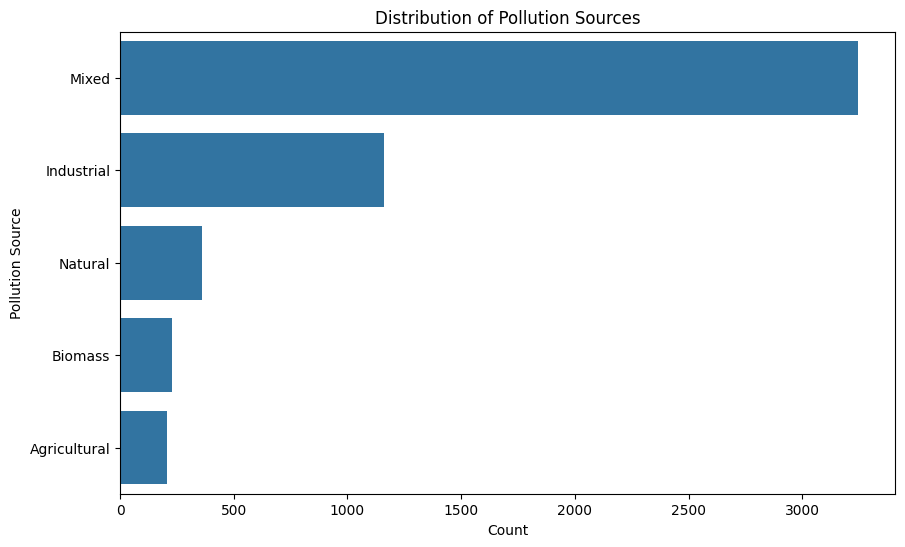

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(
    y="pollution_source",
    data=df,
    order=df["pollution_source"].value_counts().index
)
plt.title("Distribution of Pollution Sources")
plt.xlabel("Count")
plt.ylabel("Pollution Source")
plt.show()

In [12]:
#Label_encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["pollution_source_encoded"] = le.fit_transform(df["pollution_source"])

print("Classes:", le.classes_)


Classes: ['Agricultural' 'Biomass' 'Industrial' 'Mixed' 'Natural']


In [13]:
#Define Feature and Target
FEATURE_COLS = [
    "Temperature",
    "Humidity",
    "PM2_5",
    "PM10",
    "NO2",
    "SO2",
    "CO",
    "Proximity_to_Industrial_Areas",
    "roads",
    "dump_sites",
    "agricultural_fields",
    "wind_speed",
    "wind_direction"
]

X = df[FEATURE_COLS]
y = df["pollution_source_encoded"]


In [14]:
#Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [15]:
#model_training_Randomforest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=5, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [16]:
#Acuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy :", model.score(X_test, y_test))


Train accuracy: 0.9997596153846153
Test accuracy : 0.9990384615384615


In [17]:
#Report for classify
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(
    classification_report(
        y_test,
        y_pred,
        target_names=le.classes_
    )
)


              precision    recall  f1-score   support

Agricultural       1.00      0.98      0.99        41
     Biomass       1.00      1.00      1.00        46
  Industrial       1.00      1.00      1.00       232
       Mixed       1.00      1.00      1.00       649
     Natural       1.00      1.00      1.00        72

    accuracy                           1.00      1040
   macro avg       1.00      1.00      1.00      1040
weighted avg       1.00      1.00      1.00      1040



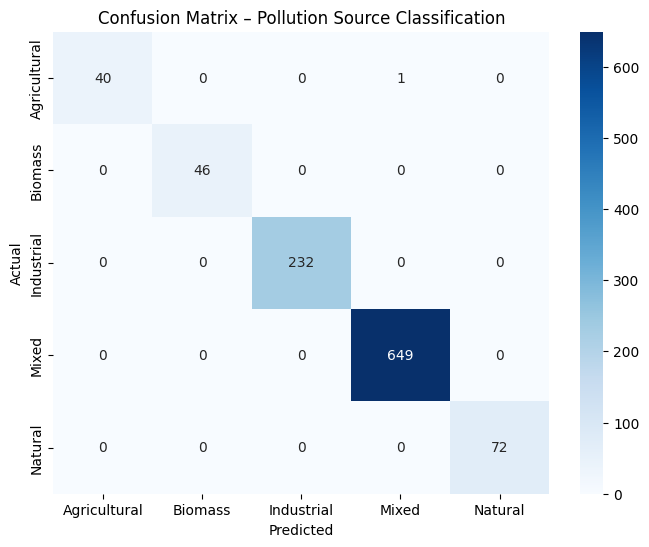

In [18]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Pollution Source Classification")
plt.show()


In [19]:

importance = pd.Series(
    model.feature_importances_,
    index=FEATURE_COLS
).sort_values(ascending=False)

importance



,0
SO2,0.243777
PM2_5,0.239309
NO2,0.206837
PM10,0.133326
CO,0.070014
Proximity_to_Industrial_Areas,0.034240
agricultural_fields,0.029959
Temperature,0.017693
Humidity,0.009543
wind_direction,0.005944


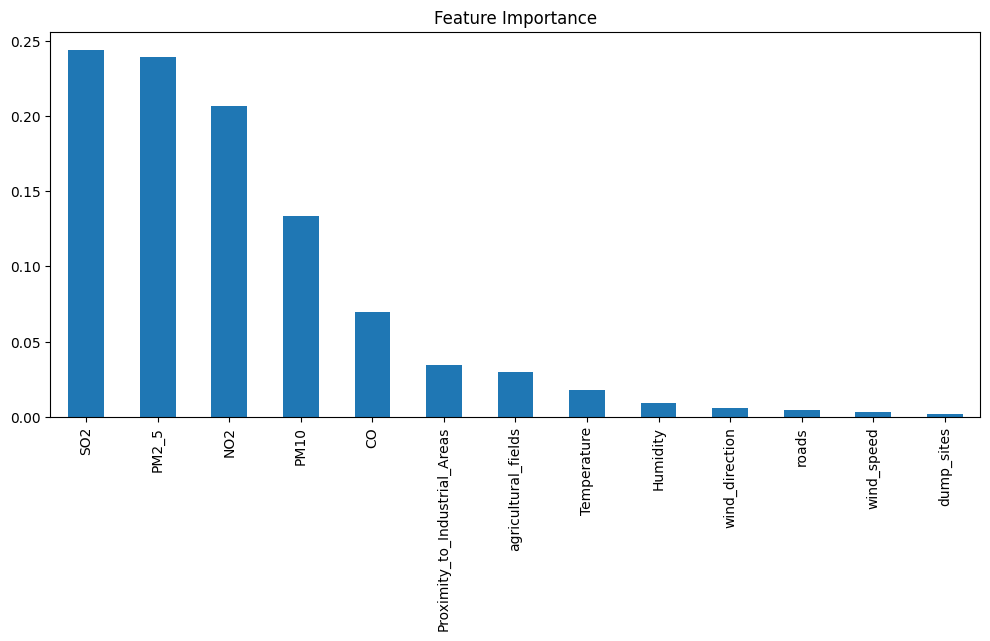

In [20]:
importance.plot(kind="bar", figsize=(12,5), title="Feature Importance")
plt.show()

In [21]:
#model_files
import joblib

joblib.dump(model, "randomforest_pollution_model.pkl")
joblib.dump(le, "pollution_label_encoder.pkl")
FEATURE_COLS = [
    "Temperature",
    "Humidity",
    "PM2_5",
    "PM10",
    "NO2",
    "SO2",
    "CO",
    "Proximity_to_Industrial_Areas",
    "roads",
    "dump_sites",
    "agricultural_fields",
    "wind_speed",
    "wind_direction"
]

joblib.dump(FEATURE_COLS, "model_feature_order.pkl")


['model_feature_order.pkl']

## Train XGBoost Model



In [22]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=15,
    objective='multi:softmax',
    num_class=len(le.classes_),
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train, y_train)
print("XGBoost model training complete.")

XGBoost model training complete.


In [23]:
print("XGBoost Train accuracy:", xgb_model.score(X_train, y_train))
print("XGBoost Test accuracy :", xgb_model.score(X_test, y_test))

XGBoost Train accuracy: 1.0
XGBoost Test accuracy : 0.9990384615384615


In [24]:
#xg_Report_analyse
from sklearn.metrics import classification_report

y_pred_xgb = xgb_model.predict(X_test)

print(
    classification_report(
        y_test,
        y_pred_xgb,
        target_names=le.classes_
    )
)

              precision    recall  f1-score   support

Agricultural       1.00      0.98      0.99        41
     Biomass       1.00      1.00      1.00        46
  Industrial       1.00      1.00      1.00       232
       Mixed       1.00      1.00      1.00       649
     Natural       1.00      1.00      1.00        72

    accuracy                           1.00      1040
   macro avg       1.00      1.00      1.00      1040
weighted avg       1.00      1.00      1.00      1040



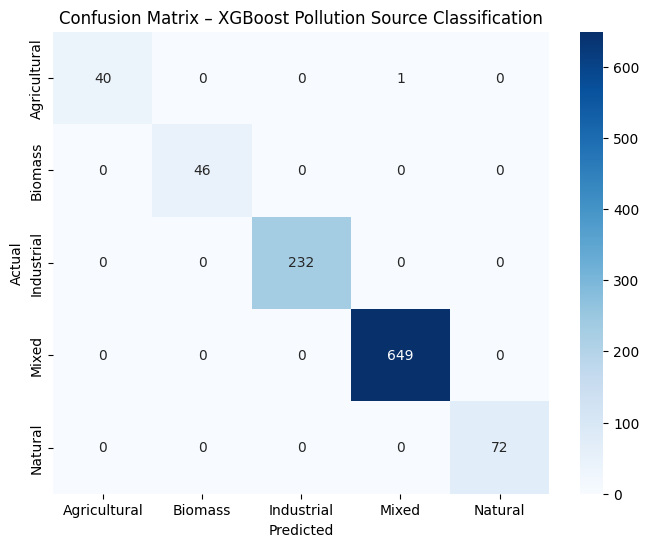

In [25]:
#confusion_matrix
from sklearn.metrics import confusion_matrix

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt="d",
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – XGBoost Pollution Source Classification")
plt.show()

XGBoost Feature Importances:
SO2                              0.569402
NO2                              0.208432
PM2_5                            0.096318
agricultural_fields              0.055000
CO                               0.044779
PM10                             0.020500
roads                            0.005239
Proximity_to_Industrial_Areas    0.000217
Temperature                      0.000039
wind_speed                       0.000031
Humidity                         0.000027
wind_direction                   0.000016
dump_sites                       0.000000
dtype: float32


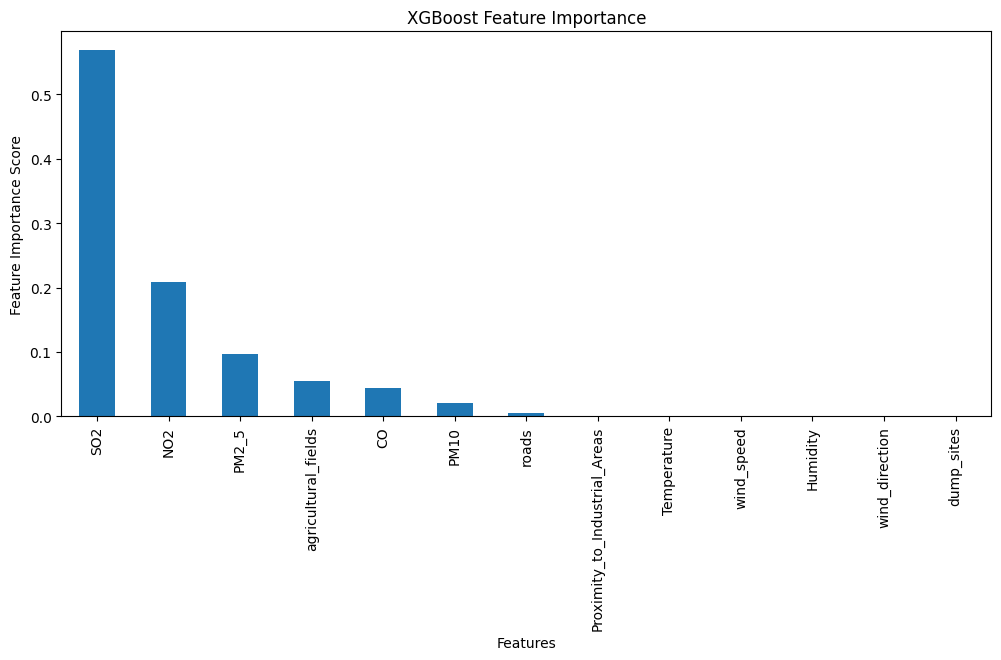

In [26]:

importance_xgb = pd.Series(
    xgb_model.feature_importances_,
    index=FEATURE_COLS
).sort_values(ascending=False)

print("XGBoost Feature Importances:")
print(importance_xgb)

plt.figure(figsize=(12, 5))
importance_xgb.plot(kind="bar", title="XGBoost Feature Importance")
plt.ylabel("Feature Importance Score")
plt.xlabel("Features")
plt.show()

In [27]:
import joblib

joblib.dump(xgb_model, "xgboost_pollution_model.pkl")
joblib.dump(le, "pollution_label_encoder_xgb.pkl")

print("XGBoost model and label encoder saved.")

XGBoost model and label encoder saved.


In [28]:
#model_comparision


